In [7]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values
from ipynb.fs.full.plots import single_barplot

In [8]:
df = get_df()
df = df[['D10_ML_Management_Framework_None', 'D10_ML_Management_Framework_CRISP-DM', 'D10_ML_Management_Framework_Kanban', 'D10_ML_Management_Framework_Lean','D10_ML_Management_Framework_RUP', 'D10_ML_Management_Framework_SAFe', 'D10_ML_Management_Framework_Scrum', 'D10_ML_Management_Framework_Others']]
df.head(10)

,D10_ML_Management_Framework_None,D10_ML_Management_Framework_CRISP-DM,D10_ML_Management_Framework_Kanban,D10_ML_Management_Framework_Lean,D10_ML_Management_Framework_RUP,D10_ML_Management_Framework_SAFe,D10_ML_Management_Framework_Scrum,D10_ML_Management_Framework_Others
2,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted
3,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted
4,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted
5,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted
6,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted
7,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted
8,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted
9,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted
10,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted
11,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted


In [9]:
label = ['Nenhum', 'CRISP', 'KANBAN', 'Lean', 'RUP', 'SAFe', 'Scrum']
frameworks = [
    df['D10_ML_Management_Framework_None'].value_counts()['quoted'],
    df['D10_ML_Management_Framework_CRISP-DM'].value_counts()['quoted'],
    df['D10_ML_Management_Framework_Kanban'].value_counts()['quoted'],
    df['D10_ML_Management_Framework_Lean'].value_counts()['quoted'],
    df['D10_ML_Management_Framework_RUP'].value_counts()['quoted'],
    df['D10_ML_Management_Framework_SAFe'].value_counts()['quoted'],
    df['D10_ML_Management_Framework_Scrum'].value_counts()['quoted'],
    
   
]

In [10]:
d10_df= pd.DataFrame(data={'Project Context': label, 'Answers': frameworks})

In [11]:
print(d10_df)

  Project Context  Answers
0            None       67
1           CRISP       41
2          KANBAN       83
3            Lean       16
4             RUP        3
5            SAFe        8
6           Scrum      139


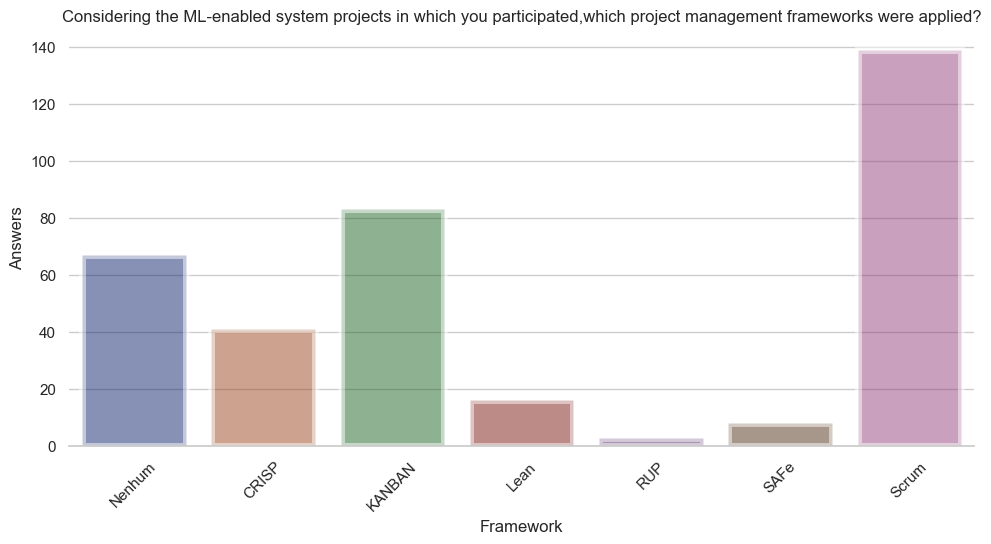

In [12]:
single_barplot(d10_df, "Project Context", "Answers", 
               title="Considering the ML-enabled system projects in which you participated,which project management frameworks were applied?",
               x_label="Framework", y_label="Answers", x_label_rotation=0)